## Homework 3 - Numerical 

In [1]:
import math
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('seaborn')
%matplotlib inline

In [2]:
# covariance function for the Fractional Brownian motion 
def fbm_covariance(s: float, t: float, h:float):  
    if s < t:
        return (1/2)*( (t**(2*h)) + (s**(2*h)) - (abs(t-s)**(2*h)) )
    else:
        return (1/2)*( (s**(2*h)) + (t**(2*h)) - (abs(s-t)**(2*h)) )

In [3]:
# time index for the increments
time_index = np.arange(0.01, 1.01, 0.01)

In [4]:
np.random.seed(seed=1)

## Fractional Brownian Motion

In [5]:
fbm1_cov = np.reshape(np.array([fbm_covariance(i,j, h=0.1) for j in time_index for i in time_index]), (100,100))

In [6]:
fbm1_cov

array([[0.39810717, 0.22865253, 0.21836827, ..., 0.20007405, 0.20006576,
        0.20005761],
       [0.22865253, 0.45730505, 0.27756615, ..., 0.23070191, 0.23068516,
        0.23066872],
       [0.21836827, 0.27756615, 0.49593442, ..., 0.25105412, 0.25102877,
        0.25100387],
       ...,
       [0.20007405, 0.23070191, 0.25105412, ..., 0.99596761, 0.7979262 ,
        0.76933128],
       [0.20006576, 0.23068516, 0.25102877, ..., 0.7979262 , 0.99799195,
        0.79994239],
       [0.20005761, 0.23066872, 0.25100387, ..., 0.76933128, 0.79994239,
        1.        ]])

In [7]:
fbm1_plot = np.array([np.linalg.cholesky(fbm1_cov).dot(np.random.normal(loc=0, scale=1, size=100)) for _ in range(100)])

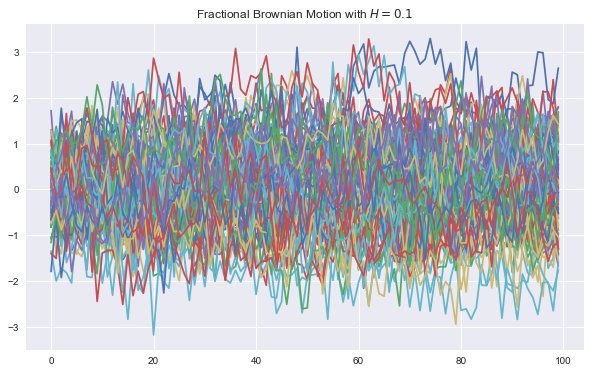

In [8]:
plt.figure(figsize=(10,6))
plt.title('Fractional Brownian Motion with $H=0.1$')
for i in fbm1_plot:
    plt.plot(i)

In [9]:
fbm2_cov = np.reshape(np.array([fbm_covariance(i,j,h=0.5) for j in time_index for i in time_index]), (100,100))

In [10]:
fbm2_cov

array([[0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.02, 0.02, ..., 0.02, 0.02, 0.02],
       [0.01, 0.02, 0.03, ..., 0.03, 0.03, 0.03],
       ...,
       [0.01, 0.02, 0.03, ..., 0.98, 0.98, 0.98],
       [0.01, 0.02, 0.03, ..., 0.98, 0.99, 0.99],
       [0.01, 0.02, 0.03, ..., 0.98, 0.99, 1.  ]])

In [11]:
fbm2_plot = np.array([np.linalg.cholesky(fbm2_cov).dot(np.random.normal(loc=0, scale=1, size=100)) for _ in range(100)])

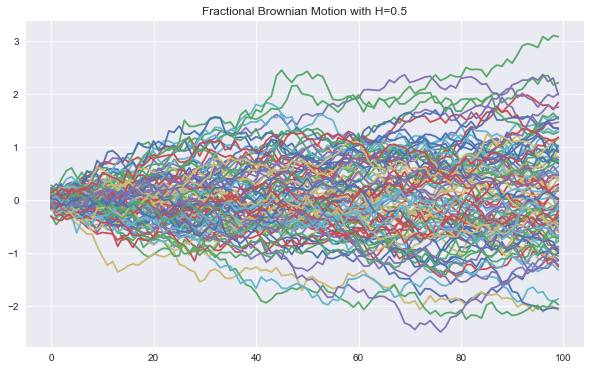

In [12]:
plt.figure(figsize=(10,6))
plt.title('Fractional Brownian Motion with H=0.5')
for i in fbm2_plot:
    plt.plot(i)

In [13]:
fbm3_cov = np.reshape(np.array([fbm_covariance(i,j,h=0.9) for j in time_index for i in time_index]), (100,100))

In [14]:
fbm3_cov

array([[2.51188643e-04, 4.37344830e-04, 5.95627529e-04, ...,
        8.94513357e-03, 9.01742523e-03, 9.08957025e-03],
       [4.37344830e-04, 8.74689659e-04, 1.21912854e-03, ...,
        1.80039832e-02, 1.81487150e-02, 1.82931517e-02],
       [5.95627529e-04, 1.21912854e-03, 1.81475607e-03, ...,
        2.71485252e-02, 2.73658473e-02, 2.75827241e-02],
       ...,
       [8.94513357e-03, 1.80039832e-02, 2.71485252e-02, ...,
        9.64288386e-01, 9.73054623e-01, 9.81706848e-01],
       [9.01742523e-03, 1.81487150e-02, 2.73658473e-02, ...,
        9.73054623e-01, 9.82072048e-01, 9.90910430e-01],
       [9.08957025e-03, 1.82931517e-02, 2.75827241e-02, ...,
        9.81706848e-01, 9.90910430e-01, 1.00000000e+00]])

In [15]:
fbm3_plot = np.array([np.linalg.cholesky(fbm3_cov).dot(np.random.normal(loc=0, scale=1, size=100)) for _ in range(100)])

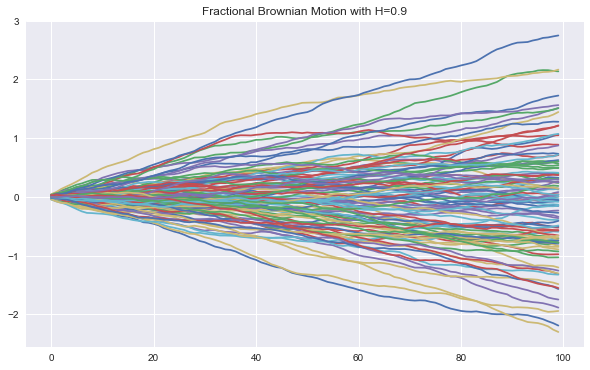

In [16]:
plt.figure(figsize=(10,6))
plt.title('Fractional Brownian Motion with H=0.9')
for i in fbm3_plot:
    plt.plot(i)

## Poisson Process

In [17]:
lambda_mean = 1

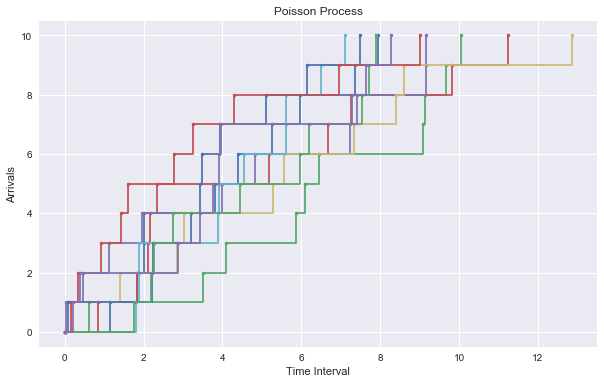

In [35]:
plt.figure(figsize=(10,6))
plt.title('Poisson Process')
plt.xlabel('Time Interval')
plt.ylabel('Arrivals')
for i in range(10):
    plt.step(x=np.insert(np.cumsum(np.random.exponential(lambda_mean, size=10)), obj=0, values=0), 
             y=np.arange(0,11), 
             marker=".", linestyle="-", where='post')